In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel import PanelOLS, PooledOLS

In [2]:
revenue= pd.read_excel('EBITDA.xlsx')
revenue.head().iloc[:, -19:]

,Price,Market Cap ▾,Volume,% (1D),% (1M),% (6M),Sector,Backed by VC or not,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,216.77,702420000000,40.31M,-0.0156,0.1042,0.1832,Automotive / Technology,1,-136.215,-254.411,-396.213,-74.014,-294.040,-888.663,-674.914,-1962.000,-976.000,-862.000,690.000
1,393.45,64320000000,68084,0.0202,0.0205,0.2024,Technology / Communication Equipment,0,1104.000,1224.000,1071.000,1105.000,833.000,1144.000,1343.000,1627.000,1615.000,1975.000,1792.000
2,251.11,63280000000,516.49K,0.0148,-0.0621,0.1692,Technology / Semiconductors,1,957.000,948.000,945.000,1165.000,1454.000,2532.000,2055.000,4275.000,4697.000,2688.000,2406.000
3,72.24,16820000000,930.04K,0.0637,0.1673,0.1793,Technology / Software,1,123.960,140.486,208.245,288.275,306.042,323.698,528.000,644.600,961.200,1718.000,1724.900
4,100.00,9020000000,105.13K,0.0131,0.0475,0.2210,Industrials / Nuclear Technology,0,394.570,247.329,482.995,427.107,163.998,297.958,301.049,362.392,395.417,416.167,446.378


In [3]:
revenue.columns = ['Index', 'Symbol', 'Price', 'Market Cap', 'Volume', '1D%', '1M%','6M%','Sector', 'VC', '2010',                
'2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020' ]
revenue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Index       30 non-null     int64  
 1   Symbol      30 non-null     object 
 2   Price       30 non-null     float64
 3   Market Cap  30 non-null     int64  
 4   Volume      30 non-null     object 
 5   1D%         30 non-null     float64
 6   1M%         30 non-null     float64
 7   6M%         30 non-null     float64
 8   Sector      30 non-null     object 
 9   VC          30 non-null     int64  
 10  2010        30 non-null     float64
 11  2011        30 non-null     float64
 12  2012        30 non-null     float64
 13  2013        30 non-null     float64
 14  2014        30 non-null     float64
 15  2015        30 non-null     float64
 16  2016        30 non-null     float64
 17  2017        30 non-null     float64
 18  2018        30 non-null     float64
 19  2019        30 non-null     flo

In [4]:
revenue.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,30.000000,30.000000,3.000000e+01,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,43.600000,83.981717,3.188685e+10,0.006827,0.074627,0.055480,0.666667,149.307400,153.017767,160.18930,171.710300,171.205367,220.633833,238.541700,310.197633,399.777433,405.094033,431.757333
std,32.188668,107.724922,1.276533e+11,0.039631,0.142125,0.289288,0.479463,285.576741,300.555130,310.22809,327.165378,343.851542,551.565989,496.430465,928.252972,943.686622,715.777152,634.404208
min,1.000000,0.527500,3.660000e+06,-0.142700,-0.153600,-0.703000,0.000000,-136.215000,-254.411000,-396.21300,-240.273000,-294.040000,-888.663000,-674.914000,-1962.000000,-976.000000,-862.000000,-95.059000
25%,18.500000,5.207500,4.568375e+08,0.000525,-0.006900,-0.039800,0.000000,2.543250,-1.078000,-2.87925,-3.899250,-5.982000,-4.454500,-6.138000,-3.483250,-8.157000,-0.751250,-1.635250
50%,35.000000,17.260000,3.295000e+09,0.008400,0.048800,0.066300,1.000000,57.183500,50.050000,25.88400,35.787500,49.725000,54.286500,58.599500,84.634500,96.039500,113.524500,131.361500
75%,64.250000,168.055000,8.412500e+09,0.021625,0.119375,0.182375,1.000000,131.729250,220.618250,258.81375,312.380750,273.847000,317.263000,334.715500,520.085000,620.213750,652.479250,667.455000
max,109.000000,393.450000,7.024200e+11,0.105000,0.538700,0.784500,1.000000,1104.000000,1224.000000,1071.00000,1165.000000,1454.000000,2532.000000,2055.000000,4275.000000,4697.000000,2688.000000,2406.000000


In [5]:
nonvc= revenue[revenue['VC']==0]
nonvc.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,10.000000,10.000000,1.000000e+01,10.000000,10.000000,10.000000,10.0,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,28.400000,137.351000,1.338166e+10,0.004480,0.040990,0.048410,0.0,289.320300,307.182300,353.198700,352.057300,314.884100,385.037800,427.848700,510.832900,590.016200,686.728700,682.287000
std,20.876356,126.864753,1.932862e+10,0.011613,0.081413,0.101801,0.0,335.627766,352.187155,326.046551,316.673563,258.711359,331.100993,389.639518,464.046314,483.574013,594.459265,562.799444
min,3.000000,12.280000,4.397300e+08,-0.024300,-0.153600,-0.077700,0.0,18.865000,22.084000,18.976000,32.815000,29.794000,29.690000,31.174000,24.404000,29.312000,41.364000,44.323000
25%,12.500000,26.562500,1.602500e+09,0.002300,0.024700,-0.025900,0.0,64.780250,82.964500,104.338000,116.377250,101.865750,136.436750,147.016250,164.959750,202.212750,258.036250,208.810250
50%,21.500000,103.630000,7.315000e+09,0.006200,0.048800,0.021050,0.0,163.885500,261.313000,336.999000,367.936000,265.531500,332.079000,326.831000,472.470000,545.281500,571.333500,643.082500
75%,44.250000,222.460000,1.700750e+10,0.009100,0.094275,0.099750,0.0,382.279750,356.822000,468.533750,435.711000,459.332250,483.082000,548.466250,627.189000,853.739500,975.096250,891.409000
max,65.000000,393.450000,6.432000e+10,0.020200,0.139900,0.221000,0.0,1104.000000,1224.000000,1071.000000,1105.000000,833.000000,1144.000000,1343.000000,1627.000000,1615.000000,1975.000000,1792.000000


In [6]:
vc= revenue[revenue['VC']==1]
vc.describe()

,Index,Price,Market Cap,1D%,1M%,6M%,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,20.000000,20.000000,2.000000e+01,20.00000,20.000000,20.000000,20.0,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000,20.00000,20.000000
mean,51.200000,57.297075,4.113944e+10,0.00800,0.091445,0.059015,1.0,79.30095,75.935500,63.684600,81.536800,99.366000,138.431850,143.888200,209.88000,304.658050,264.27670,306.492500
std,34.533889,88.543451,1.562835e+11,0.04826,0.163701,0.350407,0.0,235.88579,245.683313,259.093151,300.321183,363.950895,625.360755,525.303185,1086.90980,1104.496372,742.95156,643.977224
min,1.000000,0.527500,3.660000e+06,-0.14270,-0.116200,-0.703000,1.0,-136.21500,-254.411000,-396.213000,-240.273000,-294.040000,-888.663000,-674.914000,-1962.00000,-976.000000,-862.00000,-95.059000
25%,22.500000,1.917500,2.585300e+08,-0.00095,-0.011575,-0.058900,1.0,-2.75000,-3.717000,-9.668000,-37.162000,-23.778000,-11.566750,-18.892500,-10.84925,-12.683750,-11.29100,-14.616250
50%,50.000000,10.155000,1.045000e+09,0.01475,0.063600,0.102050,1.0,7.72950,5.969000,5.570000,-1.219000,-2.732000,-1.335500,-3.902500,-0.99700,5.411000,13.92850,51.214000
75%,77.250000,64.485000,6.612500e+09,0.02545,0.151025,0.198500,1.0,71.42225,77.054750,58.113000,48.322250,74.897000,66.142750,92.598000,140.16150,143.647500,165.33000,176.425500
max,109.000000,251.110000,7.024200e+11,0.10500,0.538700,0.784500,1.0,957.00000,948.000000,945.000000,1165.000000,1454.000000,2532.000000,2055.000000,4275.00000,4697.000000,2688.00000,2406.000000


In [7]:
corr= revenue[['VC', 'Market Cap','Price', '2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']].corr()
corr

,VC,Market Cap,Price,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
VC,1.000000,0.104258,-0.356305,-0.352608,-0.368899,-0.447449,-0.396450,-0.300516,-0.214369,-0.274255,-0.155449,-0.144983,-0.282979,-0.284014
Market Cap,0.104258,1.000000,0.327445,-0.079818,-0.142396,-0.235868,-0.030104,-0.148711,-0.275509,-0.239708,-0.361807,-0.169478,-0.227417,0.183468
Price,-0.356305,0.327445,1.000000,0.650914,0.670807,0.563361,0.681546,0.583120,0.466402,0.532715,0.399248,0.478665,0.532805,0.666994
2010,-0.352608,-0.079818,0.650914,1.000000,0.963258,0.949833,0.945149,0.891998,0.859254,0.907737,0.805535,0.812168,0.840926,0.785626
2011,-0.368899,-0.142396,0.670807,0.963258,1.000000,0.955526,0.954948,0.910061,0.870599,0.925194,0.822306,0.821113,0.872675,0.783191
2012,-0.447449,-0.235868,0.563361,0.949833,0.955526,1.000000,0.953561,0.917715,0.885384,0.936648,0.834543,0.823384,0.895986,0.791971
2013,-0.396450,-0.030104,0.681546,0.945149,0.954948,0.953561,1.000000,0.955650,0.893042,0.942463,0.828621,0.865554,0.899059,0.871380
2014,-0.300516,-0.148711,0.583120,0.891998,0.910061,0.917715,0.955650,1.000000,0.968452,0.984669,0.928300,0.953403,0.935192,0.858196
2015,-0.214369,-0.275509,0.466402,0.859254,0.870599,0.885384,0.893042,0.968452,1.000000,0.981369,0.988628,0.982537,0.914072,0.777954
2016,-0.274255,-0.239708,0.532715,0.907737,0.925194,0.936648,0.942463,0.984669,0.981369,1.000000,0.954814,0.954662,0.955644,0.839685


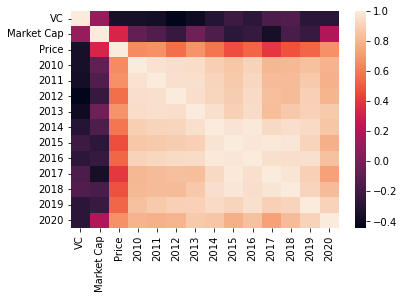

In [8]:
import seaborn as sns
sns.heatmap(corr);

In [9]:
reg= revenue[['VC', '2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
reg.head()

,VC,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,-136.215,-254.411,-396.213,-74.014,-294.040,-888.663,-674.914,-1962.000,-976.000,-862.000,690.000
1,0,1104.000,1224.000,1071.000,1105.000,833.000,1144.000,1343.000,1627.000,1615.000,1975.000,1792.000
2,1,957.000,948.000,945.000,1165.000,1454.000,2532.000,2055.000,4275.000,4697.000,2688.000,2406.000
3,1,123.960,140.486,208.245,288.275,306.042,323.698,528.000,644.600,961.200,1718.000,1724.900
4,0,394.570,247.329,482.995,427.107,163.998,297.958,301.049,362.392,395.417,416.167,446.378


In [10]:
df_long = reg.melt(id_vars=['VC'], var_name='Year', value_name='Value')
df_long['Year'] = df_long['Year'].astype(int)
year = df_long.Year
df_long = df_long.set_index([df_long.index, 'Year'])
df_long['Year'] = pd.Categorical(year)
df_long

,,VC,Value,Year
,Year,,,
0,2010,1,-136.215,2010
1,2010,0,1104.000,2010
2,2010,1,957.000,2010
3,2010,1,123.960,2010
4,2010,0,394.570,2010
...,...,...,...,...
325,2020,0,914.312,2020
326,2020,0,778.338,2020
327,2020,0,822.700,2020


# Pooled Regression

In [11]:
exog_vars = ['Year', 'VC']
exog = sm.add_constant(df_long[exog_vars])
mod = PooledOLS(df_long['Value'], exog)
pooled_res = mod.fit()
print(pooled_res)

                          PooledOLS Estimation Summary                          
Dep. Variable:                  Value   R-squared:                        0.0867
Estimator:                  PooledOLS   R-squared (Between):              0.0867
No. Observations:                 330   R-squared (Within):               0.0000
Date:                Sat, Aug 17 2024   R-squared (Overall):              0.0867
Time:                        15:35:47   Log-likelihood                   -2553.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      2.7458
Entities:                         330   P-value                           0.0021
Avg Obs:                       1.0000   Distribution:                  F(11,318)
Min Obs:                       1.0000                                           
Max Obs:                       1.0000   F-statistic (robust):             2.7458
                            

In [12]:
df_long.to_csv(r'EBITDA_PanelData.csv')

# Logistic Regression

In [13]:
from sklearn.linear_model import LogisticRegression
# Prepare the features and target
X = df_long[['Year', 'Value']]  # Features
y = df_long['VC']  # Target

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=877)

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_prob)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the model's coefficients and evaluation metrics
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC: {roc_auc}')
print('Confusion Matrix:\n', conf_matrix)

# Cross-validation scores
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
print('Cross-Validation Accuracy Scores:', cv_scores)
print('Mean Cross-Validation Accuracy:', cv_scores.mean())

Intercept: [2.34907499e-07]
Coefficients: [[ 0.00049135 -0.00139235]]
Accuracy: 0.6867469879518072
Precision: 0.7246376811594203
Recall: 0.8771929824561403
F1 Score: 0.7936507936507936
ROC AUC: 0.7901484480431848
Confusion Matrix:
 [[ 7 19]
 [ 7 50]]
Cross-Validation Accuracy Scores: [0.68181818 0.63636364 0.66666667 0.66666667 0.68181818]
Mean Cross-Validation Accuracy: 0.6666666666666666


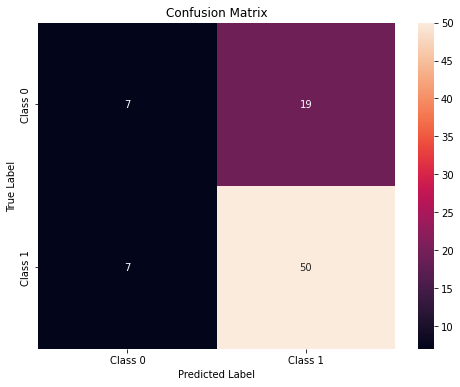

In [15]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Plot confusion matrix
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', 
            xticklabels=['Class 0', 'Class 1'], 
            yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


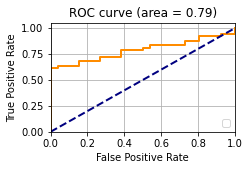

In [16]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(3.3, 2)) 
plt.plot(fpr, tpr, color='darkorange', lw=2)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve (area = 0.79)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

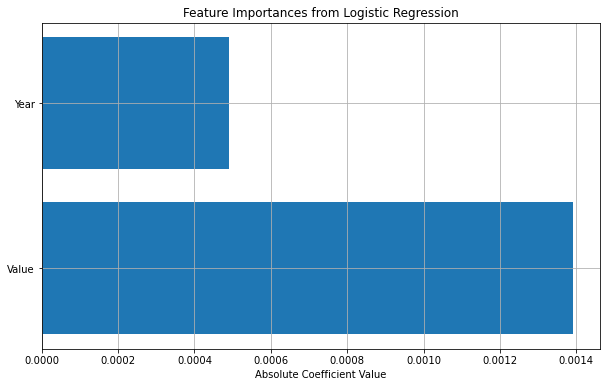

In [17]:
coefficients = model.coef_[0]
features = X.columns
feature_importances = np.abs(model.coef_[0])
sorted_idx = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_idx)), feature_importances[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [features[i] for i in sorted_idx])
plt.title('Feature Importances from Logistic Regression')
plt.xlabel('Absolute Coefficient Value')
plt.grid(True)
plt.show()

# Exploratory Data Analysis

In [18]:
ones= revenue[revenue['VC']==1]
ones= ones[['Symbol','2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
df =ones
df.iloc[:, -11:]

,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,-136.215,-254.411,-396.213,-74.014,-294.040,-888.663,-674.914,-1962.000,-976.000,-862.000,690.000
2,957.000,948.000,945.000,1165.000,1454.000,2532.000,2055.000,4275.000,4697.000,2688.000,2406.000
3,123.960,140.486,208.245,288.275,306.042,323.698,528.000,644.600,961.200,1718.000,1724.900
5,56.359,79.136,-51.103,81.001,101.975,61.619,88.719,130.830,123.399,152.138,150.089
6,4.569,3.728,6.490,9.823,12.953,16.595,17.721,21.763,39.417,54.844,68.823
7,420.569,488.727,482.064,553.064,594.791,683.543,808.091,833.399,963.076,823.437,599.820
8,10.404,8.158,6.549,3.666,11.721,9.318,5.399,5.515,6.982,8.155,-8.074
9,10.309,22.652,16.831,20.841,39.903,46.954,40.555,79.240,92.462,85.198,133.102
10,-54.605,-56.143,-61.437,-240.273,-157.039,-90.458,-40.610,-2.707,-138.700,125.703,146.504
11,-135.074,-103.953,-87.689,-71.300,-57.840,-24.500,-66.211,-80.171,-93.506,-90.298,-95.059


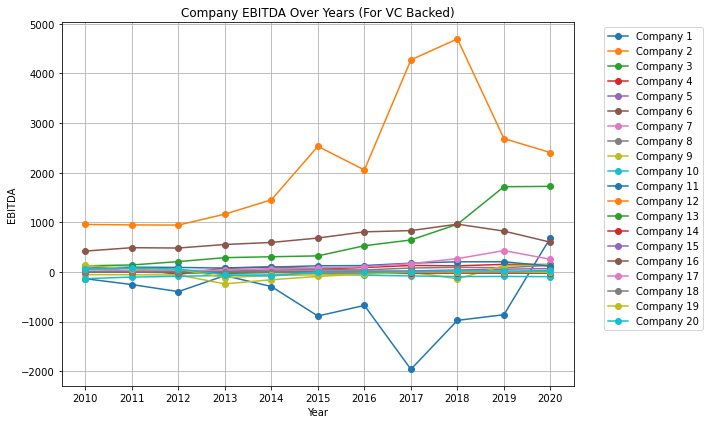

In [19]:
company_labels = {symbol: f'Company {i+1}' for i, symbol in enumerate(df['Symbol'])}
df['Symbol'] = df['Symbol'].replace(company_labels)

# Set the 'Symbol' column as the index
df.set_index('Symbol', inplace=True)

# Transpose the DataFrame to have years as rows and symbols as columns
df = df.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('EBITDA')
plt.title(r'Company EBITDA Over Years (For VC Backed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()

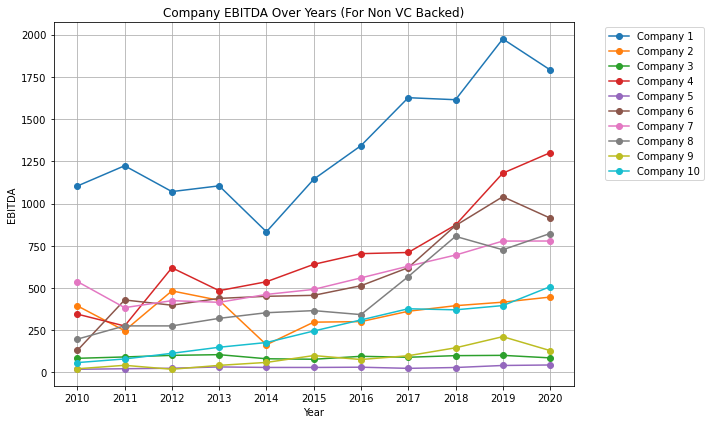

In [20]:
ones= revenue[revenue['VC']==0]
ones= ones[['Symbol','2010','2011','2012', '2013','2014', '2015', '2016', '2017', '2018', '2019','2020']]
df =ones
df
company_labels = {symbol: f'Company {i+1}' for i, symbol in enumerate(df['Symbol'])}
df['Symbol'] = df['Symbol'].replace(company_labels)

# Set the 'Symbol' column as the index
df.set_index('Symbol', inplace=True)

# Transpose the DataFrame to have years as rows and symbols as columns
df = df.transpose()

# Plotting the data
plt.figure(figsize=(10, 6))
for column in df.columns:
    plt.plot(df.index, df[column], marker='o', label=column)

plt.xlabel('Year')
plt.ylabel('EBITDA')
plt.title(r'Company EBITDA Over Years (For Non VC Backed)')

# Move the legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()  # Adjust the layout to make room for the legend

plt.show()